# Solve all problems while demonstrating each step clearly. The Exam is worth a  total of 20 points of varying it.

## (3 pts) Define sample space, measurable space and probability measure and give examples in each case. Explain their significance in mathematical finance.

1. **Sample Space** -- a set of all possible outcimes in an experiment. Every result that can be gotten in the experiment like rolling a dice; all the possible outcomes are {1, 2, 3, 4, 5, 6} which is the sample space of rolling a dice
> For mathematical finance this can be:
> 
> Getting an investment portfolio and listing all the possible returns from investments in the portfolio from high earners to the lowest earners
>
2. **Measurable space** -- a pair $(\omega, F)$ where $\omega$ is the sample space and $F$ are subsets of $\omega$ such that:
- $\emptyset \in F$
- $A and A^c \in F$
- given countable sets $A_1, A_2, A_3, ...$ which are in F then their union $\cup A_i$ is also in F
> For mathematical finance
>
> $\omega$ -- all the possible states a stock or insurance value can hold. F represents grouping the stock or insurance into appreciation, depreciation or steady. The measure space is then given as the stock dropping or going above a threshold and in the case of insurance the premiums reaching a peak in the event of a recession or inflation
>
3. **Probability measure** -- giving likelihood values to outcomes of an experiment. Like if you roll a dice your probability measure can be expressed as

|face|probability|
|:---|:--|
|1|1/6|
|2|1/6|
|3|1/6|
|4|1/6|
|5|1/6|
|6|1/6|

expressed as

$$
P on (\omega, F)\\
omega\ ->\ the\ faces\ \{ 1, 2, 3, 4, 5, 6 \}\\
F\ ->\ getting\ \{ 1\}\ or\ \{ 2, 3, 4, 5, 6 \}
$$

and it is such that:

- P($\omega$) = 1
- P(A) $\geq 0$ for $A \in F$
- all disjoint sets in F have countable additivity

> In Mathematical Finance
>
> Used to model the likelihood of a stock reaching a certain values or exceeding the value



## (3 pts) Completely characterize a normal distribution. Explain in details the significance of a normal distribution in the pricing of options.

A normal distribution is characterized by its mean($\mu$) that discribes the central tendancy of data in the distribution and the standard deviation($\sigma$) which discribes the dispersion of the data 

given a distribution of x random variables their probability density function if they are normally distributed is given by 

$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{-\frac{(x-\mu) ^ 2}{2\sigma^2 }}
$$

**Significance in pricing options**

1. simplifies modeling of stock options and financial variables as they are independent and identical therefore their sum tend towards a normal distribution
2. Helps model the likelihood of taking loss when doing value at risk assessment of investment.
3. Simplifies the mathematical formula for calculating the value of options removing the cost of running simulations to predict stocks

## (4 pts) Simulate paths of Brownian motion and visualize them in Python. (choose your own parameters)

In [53]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
rng = np.random.default_rng(23456)
paths = int(rng.random() * 100) 
paths

76

### Borownian motion
$$
w(t_{i + 1}) = w(t_{i}) + \sqrt{\frac{t_{i + 1} - t_{i}}{n}} Z_{i + 1}
$$

$\mu, \sigma = 0.0, 1.0$

In [55]:
rng = np.random.default_rng(34)
points = int((rng.random() * 1000) * 1000)
points

4028

In [56]:
mu, sigma = 0.0, 1.0

In [57]:
# values of z from a gaus normal distrib
rng = np.random.default_rng(34)
z = rng.normal(mu, sigma, (paths, points))
z

array([[-0.03992466, -1.25773672,  2.57402319, ...,  0.4046064 ,
         1.16847336,  0.6433131 ],
       [ 0.87288867,  1.35557544, -0.10500857, ..., -1.34422181,
        -1.18539559,  1.36771612],
       [-1.17579532,  0.59120252, -0.24338544, ...,  0.96979854,
        -1.56314969, -0.02695573],
       ...,
       [ 0.94370824,  0.35457132,  1.02337113, ...,  0.42885883,
         0.53884064,  0.2409199 ],
       [-1.55947587,  0.76801045,  0.64352491, ..., -1.06522426,
        -0.3354849 , -0.94212454],
       [-1.69618187,  0.86234985, -0.20616353, ...,  0.77218675,
        -0.13529559, -0.15558201]])

In [58]:
# time 
interval = [0.0, 1.0]
dt = (interval[1] - interval[0]) / (points - 1)

In [59]:
# time interval
time = np.linspace(interval[0], interval[1], points)
time 

array([0.00000000e+00, 2.48323814e-04, 4.96647629e-04, ...,
       9.99503352e-01, 9.99751676e-01, 1.00000000e+00])

In [60]:
# implement the formula
brownian_motion = np.zeros((paths, points))
for idx in range(points - 1):
    real_idx = idx + 1
    brownian_motion[:, real_idx] = brownian_motion[:, real_idx - 1] + np.sqrt(dt) * z[:, idx]

brownian_motion

array([[ 0.00000000e+00, -6.29144494e-04, -2.04489289e-02, ...,
        -1.61867177e+00, -1.61229587e+00, -1.59388272e+00],
       [ 0.00000000e+00,  1.37552358e-02,  3.51167914e-02, ...,
        -7.52882280e-01, -7.74064922e-01, -7.92744734e-01],
       [ 0.00000000e+00, -1.85285277e-02, -9.21218490e-03, ...,
        -3.38944077e-01, -3.23661707e-01, -3.48294279e-01],
       ...,
       [ 0.00000000e+00,  1.48712314e-02,  2.04586704e-02, ...,
        -2.64546469e-01, -2.57788385e-01, -2.49297177e-01],
       [ 0.00000000e+00, -2.45746784e-02, -1.24721444e-02, ...,
         9.47191867e-02,  7.79330701e-02,  7.26464006e-02],
       [ 0.00000000e+00, -2.67289318e-02, -1.31397697e-02, ...,
        -6.61110493e-01, -6.48942148e-01, -6.51074176e-01]])

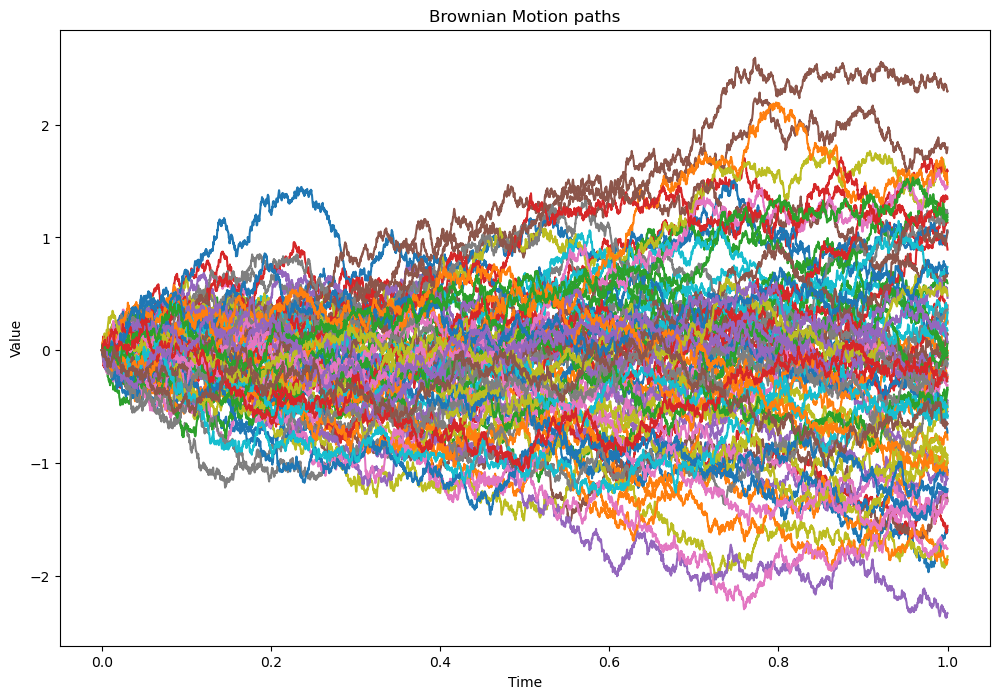

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(time, brownian_motion[path, :])
ax.set_title("Brownian Motion paths")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
plt.show()

## (3 pts) Give a detailed relationship between a martingale and a filtration. How are the two useful in mathematical finance?

Using a bet between friends; The bet is such that each friend chooses heads or tails and bets on a set of marbles before a game. If a friend calls head and the coin lands on tails they loose a marble. if they call head and it lands on heads their friend gives them one of their marbles.

**Filtration**

Is the collection of all the outcome of the coin tosses. 

- on day 1 of the bet $F_0$ they had 0 ( trivial $\sigma-algebra$ *Noone has lost a marble*
- $F_1$ the first coin toss; *daniel chooses H loses a marble*
- $F_2$ the result from the first and second toss ;*daniel chooses H loses a marble, daniel chooses H gains a marble*

**Martingale** -- the expected value of a future event $X_{t+1}$ given all the current filtrations $F_t$ for all events up to time $t$ a martingale is defined as $E(X_{t+1} | F_t)$ and is given as

$$
E(X_{t+1} | F_t) = E(X_t)
$$

The net cost for each person $X_t$ because of tossing the coin $t$ times. If you gain a marble the net cost = 1, if you loose a marble the net cost = -1.

- E(X_1 | F_0) = 0 *no cost, no coin was tossed*
- E(X_2 |F_1) = $\pm 1$ *daniel lost a marble, the friend gained a marble* 
- E(X_3 | F_2) = 0 *daniel gained a marble, friend lost a marble*

because of the fair game the expected cost is always dependent on what each friend has at the moment of the cirrent coin toss


>
> Martingales help ensure that no unwarranted gain/ unfair advantage is given to the business parties(buyer or seller) in a financial transaction.
>
> They help model a fair game where given the current financial instruments, the future value of an ideal asset is similar to its current value.
>


## (3 pts) Give the statement of Ito’s lemma. Hence apply Ito’s Lemma to $f(Wt, t) = W^2_t$.

Given that $X_t$ is a ito process given by 

$$
dX_t = \mu(X_t, t) dt + \sigma (X_t, t) dW_t
$$

then $f(X_t, t)$ is a twice differentiable equation that follows the SDE

$$
df(X_t, t) = (\frac{\partial f}{\partial t} + \mu \frac{\partial f}{\partial X} + \frac{1}{2}\sigma^2 \frac{\partial^2 f}{\partial X^2}) dt + \sigma \frac{\partial f}{\partial X}dW_t
$$

$$
f(W_t) = W_t^2
$$

Applying ito's lemma

$$
\frac{\partial f}{\partial W_t} = 2W_t\\
\frac{\partial^2 f}{\partial W_t^2} = 2\\
\frac{\partial f}{\partial t} = 0\ doesn't\ depend\ on\ t\ explicitly
$$

$\mu =0\ and\ \sigma = 1$

fitting to the equation

$$
df(W_t, t) = (0 2W_t + \frac{1}{2} * 1 * 2)dt + 1 * 2W_t dW_t\\
= dt + 2W_tdW_t\\
$$

$\therefore df(W_t, t) =  dt + 2W_tdW_t$

## (4 pts) Give a simulation of stock prices using Brownian motion in Python. Hence choose one of the parameters and explain the impact of varying it.

In [62]:
# parameters
start_price = 115
volatility = 0.15 #from the Ashford paper 
drift_coef = 0.1 # from Royak

In [63]:
stock_price = np.zeros(points)
rng = np.random.default_rng(345)
z = rng.normal(0, 1, points) 
stock_price[0] = start_price # paths start at the initial stock price
for t in range(1, points):
    stock_price[t] = stock_price[t - 1] * np.exp((drift_coef - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * z[t])

stock_price

array([115.        , 114.89292542, 115.08238823, ..., 117.65005077,
       117.41919019, 117.96669873])

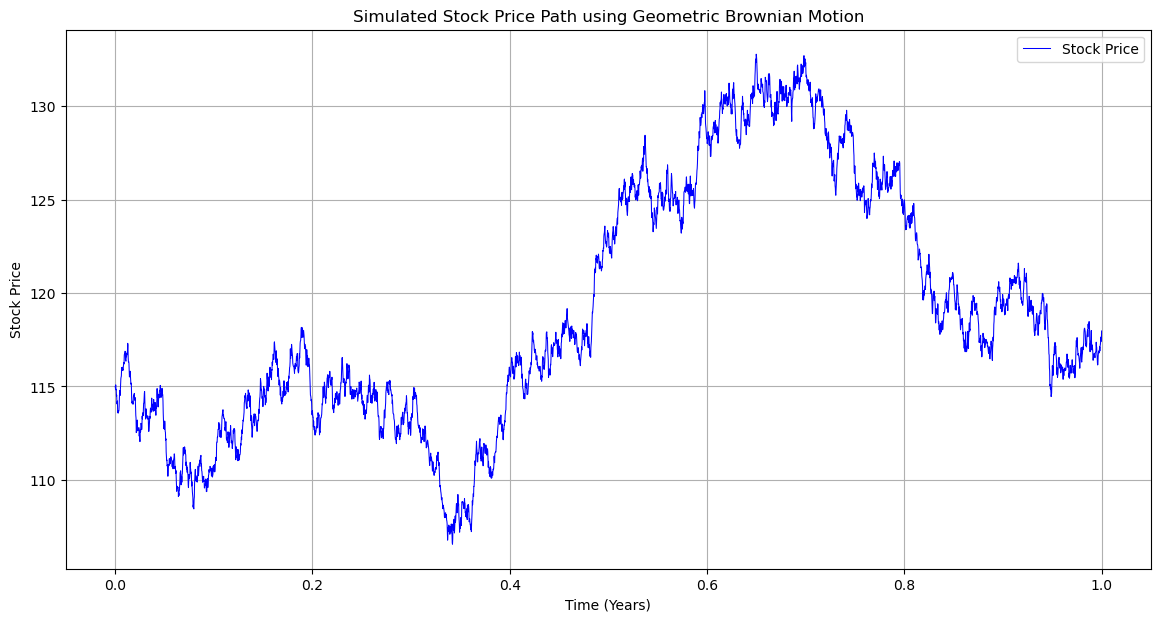

In [64]:
plt.figure(figsize=(14, 7))
plt.plot(time, stock_price, linewidth=0.75, label='Stock Price', color='blue')
plt.title('Simulated Stock Price Path using Geometric Brownian Motion')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [65]:
def alt_plot(drift, volatility):
    stock_price = np.zeros(points)
    rng = np.random.default_rng(345)
    z = rng.normal(0, 1, points) 
    stock_price[0] = start_price # paths start at the initial stock price
    for t in range(1, points):
        stock_price[t] = stock_price[t - 1] * np.exp((drift_coef - 0.5 * volatility**2) * dt + volatility * np.sqrt(dt) * z[t])
    title = f"Simulated Stock Price drift {drift} and volatility {volatility}"
    plt.figure(figsize=(14, 7))
    plt.plot(time, stock_price, linewidth=0.75, label='Stock Price', color='blue')
    plt.title(title)
    plt.xlabel('Time (Years)')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.legend()
    plt.show()

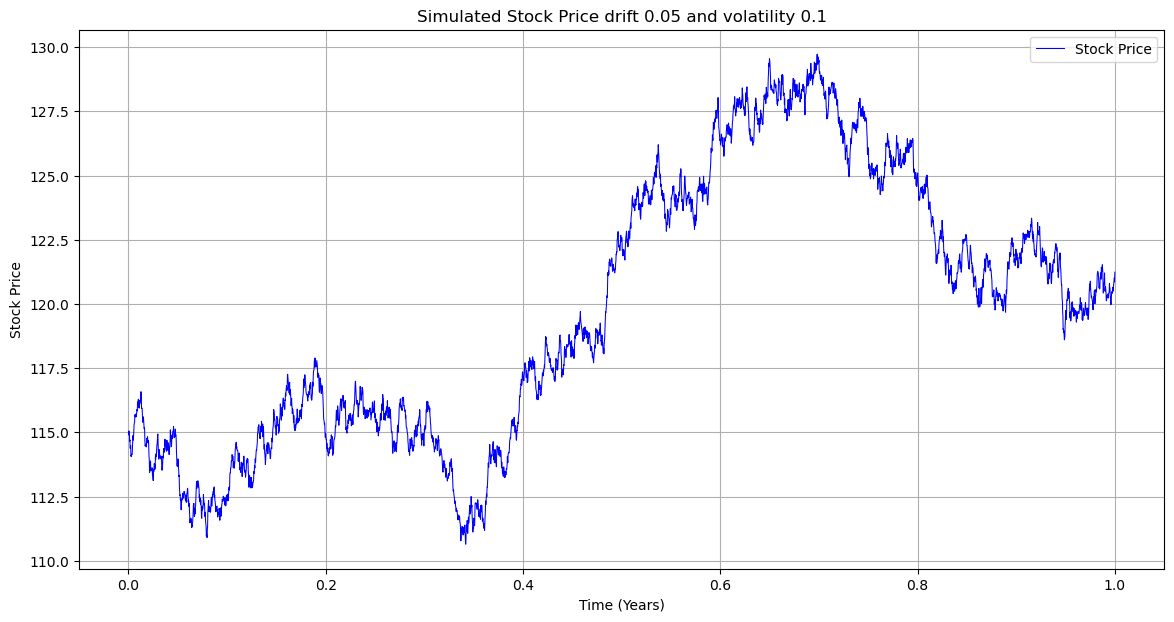

In [66]:
alt_plot(0.05,0.1) 

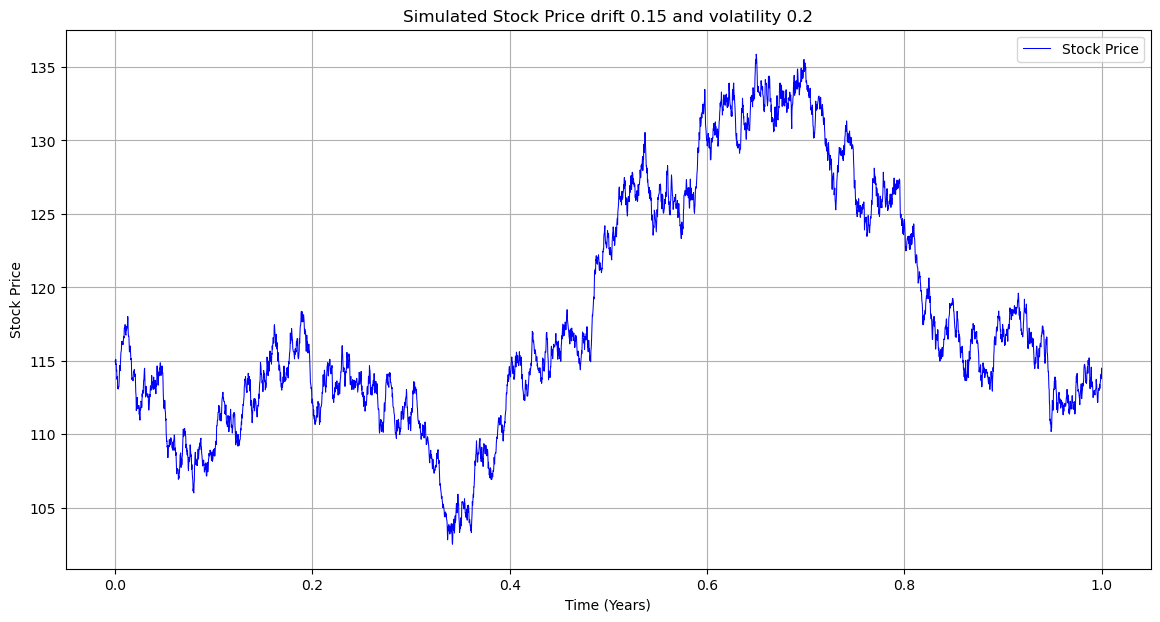

In [67]:
alt_plot(0.15,0.2)

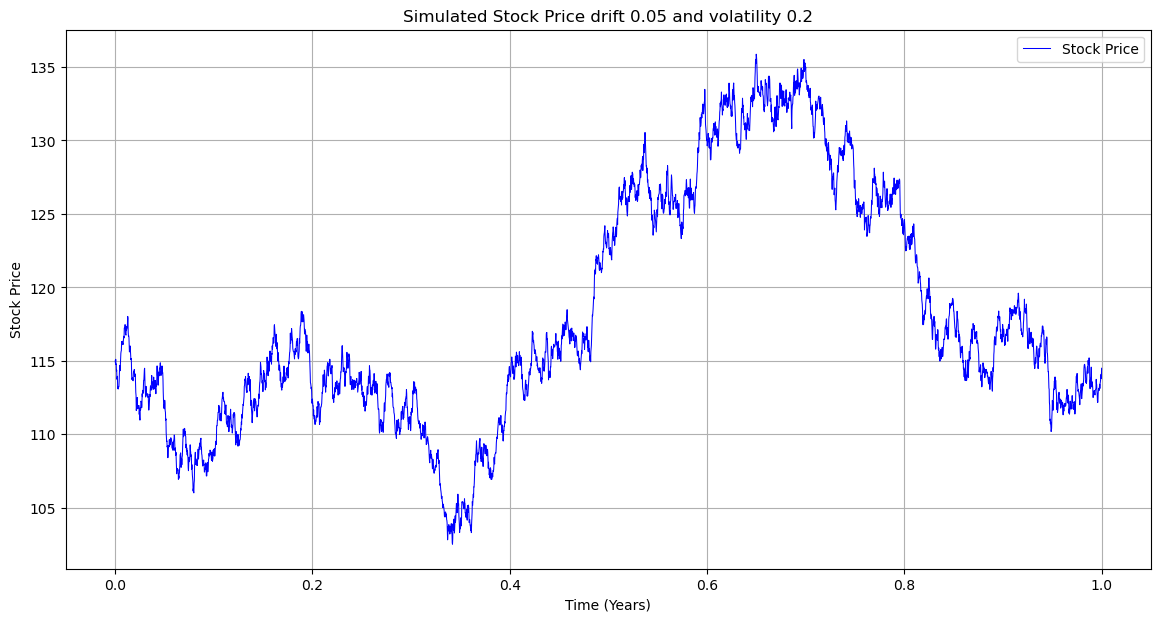

In [68]:
alt_plot(0.05,0.2) 

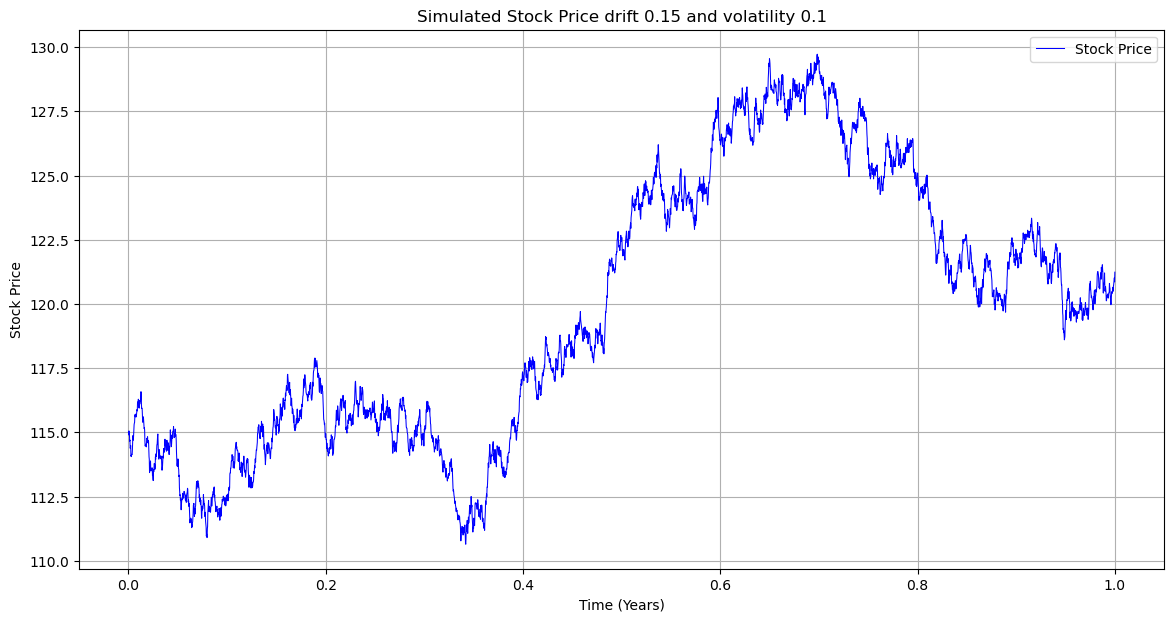

In [69]:
alt_plot(0.15,0.1)

### Observations 

**Drift** $\mu$ is the underlying trend that the stock price is expected to follow in the absence of random fluctuations

> **Higher drift** -- despite the fluctuations, the stock price trajectory tends to end higher than it started, reflecting the positive drift
>
> **Lower drift** -- the upward trend is less pronounced
>

**Volatility** $\sigma$ represents the degree of variation in price caused by market fluctuations

> **Higher Volatility** -- $\sigma 0.2$ more pronounced peaks and valleys with larger swings up and down. Reflects the high-risk nature of the stock, where the price is highly sensitive to market changes
>
> **Lower volatility** -- $\sigma 0.1$ smoother transitions and less dramatic changes in stock prices. Might appeal to more conservative investors because of less uncertainty and lower potential for sudden large gains or losses
>



# References

Ashford, K. (2021, January 7). What is volatility—and how should you manage it? Forbes Advisor. https://www.forbes.com/advisor/investing/what-is-volatility/

Royal, J., & O’Shea, A. (2024, May 3). What is the average stock market return? (R. Beaupre & J. D’Agostini, Eds.). NerdWallet. https://www.nerdwallet.com/article/investing/average-stock-market-return#:~:text=The%20average%20stock%20market%20return%20is%20about%2010%25